X.shape:(26, 2)


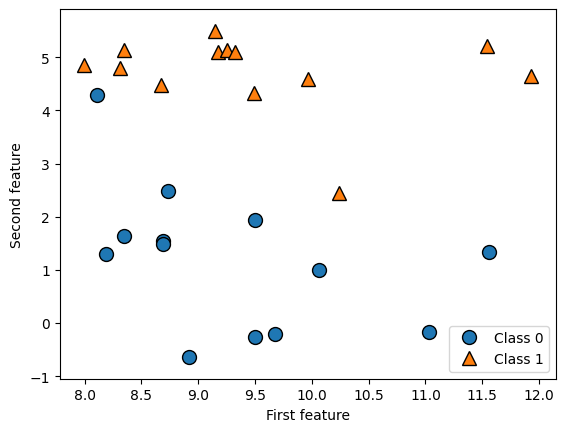

In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import mglearn
from scipy import sparse as sp
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc = 4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape:{}'.format(X.shape))

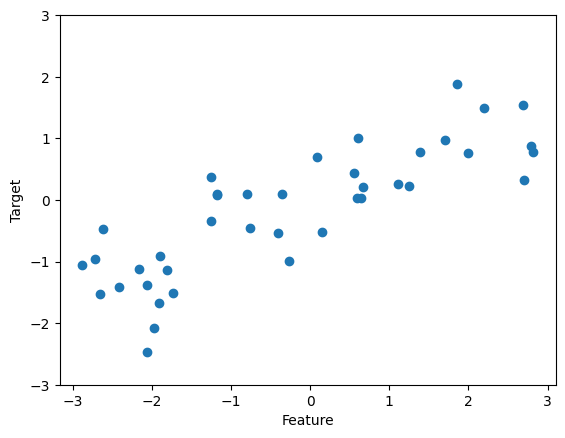

In [52]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [53]:
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.data.shape)
print({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
print(cancer.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(569, 30)
{'malignant': 212, 'benign': 357}
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


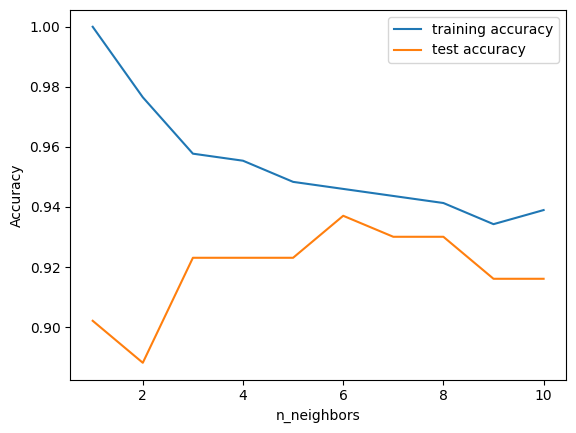

In [68]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors') 
plt.legend(loc = 0)
plt.show()   


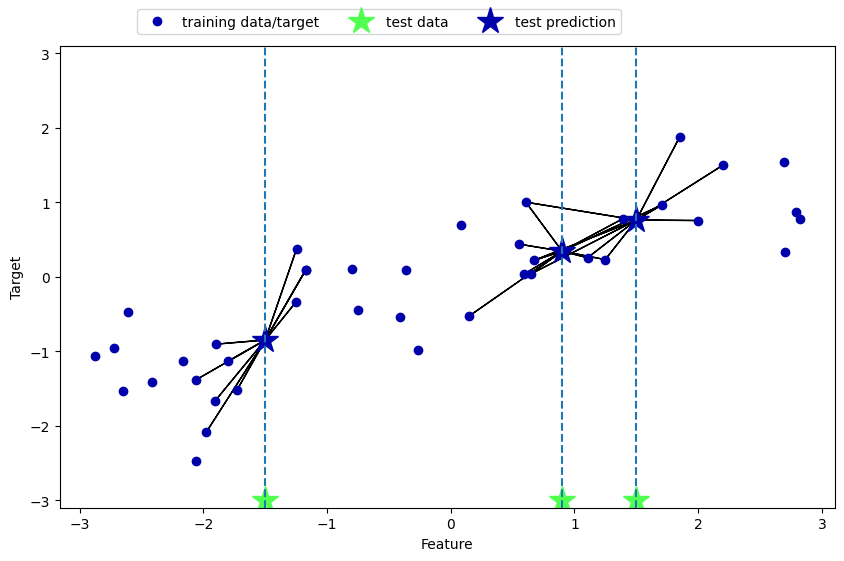

In [63]:
mglearn.plots.plot_knn_regression(n_neighbors = 10)

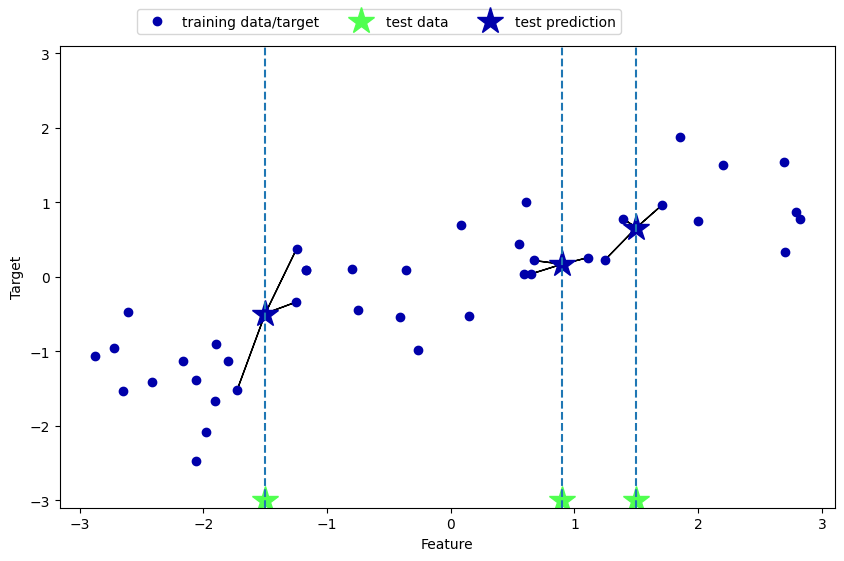

In [56]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
0.8344172446249605


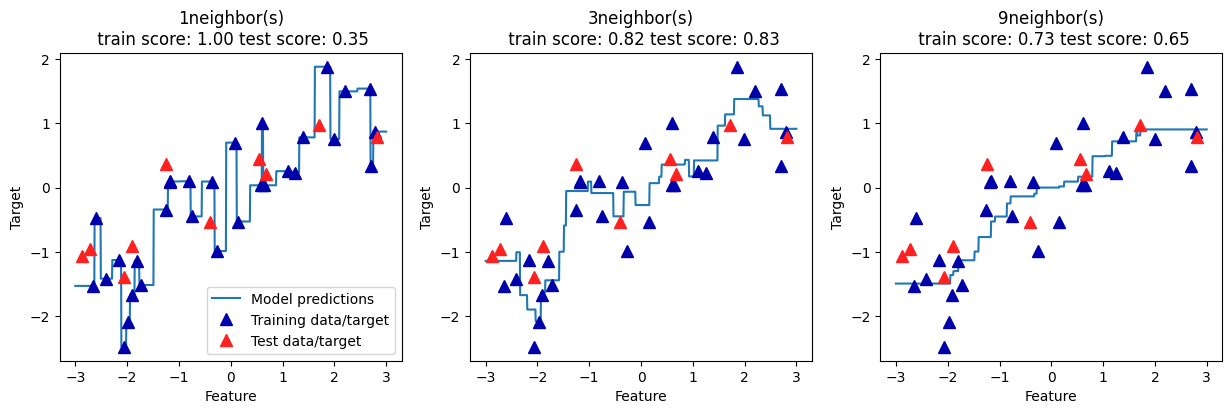

In [57]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples = 40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)
print(reg.predict(X_test))
print(reg.score(X_test, y_test))
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0),markersize = 8)
    ax.plot(X_test, y_test, '^', c = mglearn.cm2(1),markersize = 8)
    ax.set_title('{}neighbor(s)\n train score: {:.2f} test score: {:.2f}'.format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model predictions', 'Training data/target', 'Test data/target'], loc = 'best')


w[0]: 0.393906  b: -0.031804
[0.39390555]
-0.031804343026759746
0.6700890315075756
0.65933685968637


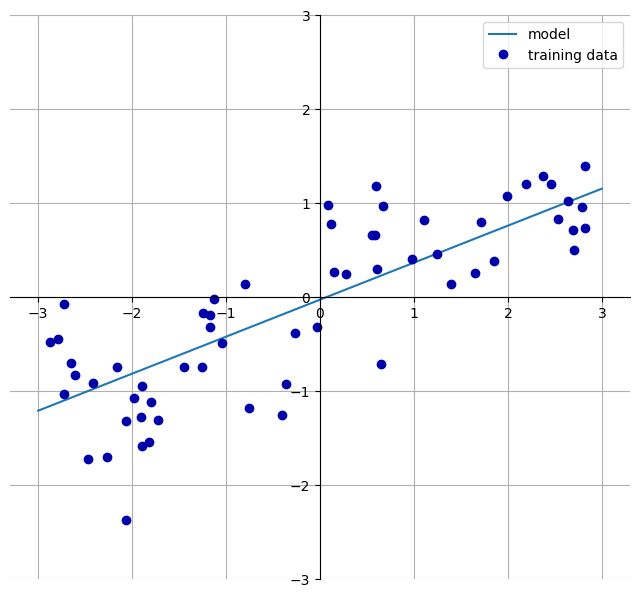

In [70]:
mglearn.plots.plot_linear_regression_wave()
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
lr = LinearRegression().fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

In [77]:
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print(X_train, y_train)
print(X_test, y_test)
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print(ridge10.score(X_train, y_train))
print(ridge10.score(X_test, y_test))
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print(ridge01.score(X_train, y_train))
print(ridge01.score(X_test, y_test))



0.9520519609032729
0.6074721959665772
[[0.00207947 0.22       0.19794721 ... 0.96119883 0.45259981 0.21311573]
 [0.00108981 0.25       0.17118768 ... 1.         0.2066777  0.04271567]
 [0.00110566 0.4        0.2181085  ... 0.96179224 0.11690584 0.0142099 ]
 ...
 [0.00162594 0.         0.35007331 ... 0.98798327 0.23505388 0.05592233]
 [0.0025059  0.         0.23643695 ... 0.97913066 0.46608557 0.22186595]
 [0.00149286 0.         0.13159824 ... 1.         0.35761589 0.12788913]] [18.5 19.6 33.2 13.1  7.5 13.6 17.4  8.4 35.4 24.  13.4 26.2  7.2 13.1
 24.5 37.2 25.  24.1 16.6 32.9 36.2 11.   7.2 22.8 28.7 14.4 24.4 18.1
 22.5 20.5 15.2 17.4 13.6  8.7 18.2 35.4 31.7 33.  22.2 20.4 23.9 25.
 12.7 29.1 12.  17.7 27.  20.6 10.2 17.5 19.7 29.8 20.5 14.9 10.9 19.5
 22.7 19.5 24.6 25.  24.5 50.  14.3 11.8 31.  28.7 16.2 43.5 25.  22.
 19.9 22.1 46.  22.9 20.2 43.1 34.6 13.8 24.3 21.5 24.4 21.2 23.8 26.6
 25.1  9.6 19.4 19.4  9.5 14.  26.5 13.8 34.7 16.3 21.7 17.5 15.6 20.9
 21.7 12.7 18.5 23.7 19

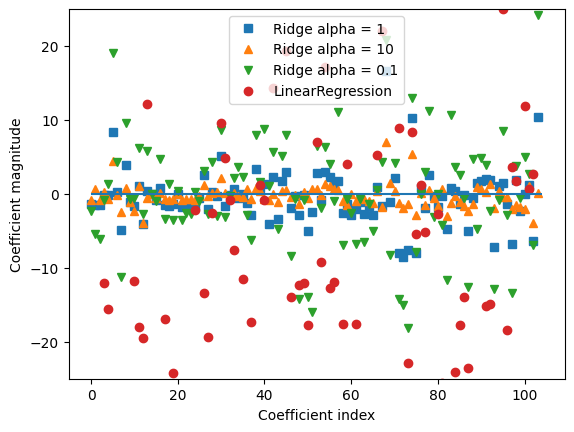

In [80]:
plt.plot(ridge.coef_, 's', label = 'Ridge alpha = 1')
plt.plot(ridge10.coef_, '^', label = 'Ridge alpha = 10')
plt.plot(ridge01.coef_, 'v', label = 'Ridge alpha = 0.1')
plt.plot(lr.coef_, 'o', label = 'LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(loc = 91)
plt.show()